In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
pd.set_option("display.max_columns",200)

In [2]:
dados = pd.read_csv("2004-2019.tsv", sep='\t')

In [3]:
dados.head()

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


In [4]:
dados["PRODUTO"].value_counts()

GASOLINA COMUM      21194
ÓLEO DIESEL         21194
GLP                 21186
ETANOL HIDRATADO    21102
GNV                 13034
ÓLEO DIESEL S10      9113
Name: PRODUTO, dtype: int64

In [5]:
diesel = dados[dados["PRODUTO"]=="ÓLEO DIESEL"].copy()

In [6]:
diesel.head()

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
43547,43547,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ÓLEO DIESEL,125,R$/l,1.447,0.031,1.350,1.490,0.198,0.021,1.249,0.012,1.2153,1.2817,0.01,5,2004
43548,43548,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ÓLEO DIESEL,373,R$/l,1.437,0.059,1.300,1.660,0.157,0.041,1.28,0.024,1.2119,1.3801,0.019,5,2004
43549,43549,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ÓLEO DIESEL,190,R$/l,1.600,0.061,1.460,1.790,0.195,0.038,1.405,0.06,1.22,1.549,0.043,5,2004
43550,43550,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ÓLEO DIESEL,157,R$/l,1.526,0.045,1.399,1.659,0.163,0.029,1.363,0.022,1.3055,1.4407,0.016,5,2004
43551,43551,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ÓLEO DIESEL,105,R$/l,1.362,0.025,1.310,1.450,0.146,0.018,1.216,0.02,1.1768,1.272,0.016,5,2004


In [7]:
diesel["DATA INICIAL"]=pd.to_datetime(diesel["DATA INICIAL"])
diesel["DATA FINAL"]=pd.to_datetime(diesel["DATA FINAL"])

In [8]:
(diesel["DATA FINAL"] - diesel["DATA INICIAL"]).value_counts()

6 days    21194
dtype: int64

In [9]:
diesel_treino = diesel[diesel["DATA FINAL"] < "2011-01-01"]
diesel_valid = diesel[diesel["DATA FINAL"] >= "2011-01-01"]

In [10]:
diesel_treino.shape, diesel_valid.shape

((9233, 21), (11961, 21))

In [11]:
y_treino = diesel_treino["PREÇO MÉDIO REVENDA"]
y_valid = diesel_valid["PREÇO MÉDIO REVENDA"]

In [12]:
baseline_treino = diesel_treino.groupby(['ESTADO'])["PREÇO MÉDIO REVENDA"].shift(1)
baseline_valid = diesel_valid.groupby(['ESTADO'])["PREÇO MÉDIO REVENDA"].shift(1)

In [13]:
diesel_treino["baseline"] = baseline_treino

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
diesel_treino[diesel_treino["ESTADO"]=="CEARA"]

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO,baseline
43553,43553,2004-05-09,2004-05-15,NORDESTE,CEARA,ÓLEO DIESEL,294,R$/l,1.548,0.058,1.390,1.660,0.186,0.037,1.362,0.022,1.31,1.4314,0.016,5,2004,NaN
43580,43580,2004-05-16,2004-05-22,NORDESTE,CEARA,ÓLEO DIESEL,289,R$/l,1.550,0.059,1.399,1.690,0.188,0.038,1.362,0.027,1.1386,1.4314,0.02,5,2004,1.548
43607,43607,2004-05-23,2004-05-29,NORDESTE,CEARA,ÓLEO DIESEL,303,R$/l,1.550,0.059,1.390,1.672,0.188,0.038,1.362,0.02,1.31,1.4314,0.015,5,2004,1.550
43634,43634,2004-05-30,2004-06-05,NORDESTE,CEARA,ÓLEO DIESEL,292,R$/l,1.549,0.060,1.399,1.690,0.187,0.039,1.362,0.02,1.31,1.4314,0.015,5,2004,1.550
43661,43661,2004-06-06,2004-06-12,NORDESTE,CEARA,ÓLEO DIESEL,301,R$/l,1.548,0.058,1.390,1.660,0.189,0.037,1.359,0.02,1.3011,1.4314,0.015,6,2004,1.549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52651,52651,2010-11-21,2010-11-27,NORDESTE,CEARA,ÓLEO DIESEL,227,R$/l,1.975,0.053,1.850,2.120,0.223,0.027,1.752,0.027,1.65,1.814,0.015,11,2010,1.972
52678,52678,2010-11-28,2010-12-04,NORDESTE,CEARA,ÓLEO DIESEL,226,R$/l,1.976,0.053,1.870,2.120,0.225,0.027,1.751,0.03,1.65,1.814,0.017,11,2010,1.975
52705,52705,2010-12-05,2010-12-11,NORDESTE,CEARA,ÓLEO DIESEL,231,R$/l,1.968,0.055,1.870,2.120,0.209,0.028,1.759,0.031,1.67,1.828,0.018,12,2010,1.976
52732,52732,2010-12-12,2010-12-18,NORDESTE,CEARA,ÓLEO DIESEL,230,R$/l,1.972,0.054,1.859,2.120,0.216,0.027,1.756,0.03,1.67,1.828,0.017,12,2010,1.968


In [15]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(y_valid[baseline_valid.notnull()], baseline_valid[baseline_valid.notnull()]))

0.008133639513965776

In [16]:
df_X_treino = pd.DataFrame(index=diesel_treino.index)
df_X_valid = pd.DataFrame(index=diesel_valid.index)

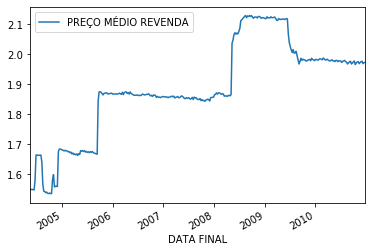

In [17]:
diesel_treino[diesel_treino["ESTADO"]=="CEARA"].plot(x="DATA FINAL", y="PREÇO MÉDIO REVENDA")

In [18]:
diesel_treino[diesel_treino["ESTADO"]=="CEARA"]

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO,baseline
43553,43553,2004-05-09,2004-05-15,NORDESTE,CEARA,ÓLEO DIESEL,294,R$/l,1.548,0.058,1.390,1.660,0.186,0.037,1.362,0.022,1.31,1.4314,0.016,5,2004,NaN
43580,43580,2004-05-16,2004-05-22,NORDESTE,CEARA,ÓLEO DIESEL,289,R$/l,1.550,0.059,1.399,1.690,0.188,0.038,1.362,0.027,1.1386,1.4314,0.02,5,2004,1.548
43607,43607,2004-05-23,2004-05-29,NORDESTE,CEARA,ÓLEO DIESEL,303,R$/l,1.550,0.059,1.390,1.672,0.188,0.038,1.362,0.02,1.31,1.4314,0.015,5,2004,1.550
43634,43634,2004-05-30,2004-06-05,NORDESTE,CEARA,ÓLEO DIESEL,292,R$/l,1.549,0.060,1.399,1.690,0.187,0.039,1.362,0.02,1.31,1.4314,0.015,5,2004,1.550
43661,43661,2004-06-06,2004-06-12,NORDESTE,CEARA,ÓLEO DIESEL,301,R$/l,1.548,0.058,1.390,1.660,0.189,0.037,1.359,0.02,1.3011,1.4314,0.015,6,2004,1.549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52651,52651,2010-11-21,2010-11-27,NORDESTE,CEARA,ÓLEO DIESEL,227,R$/l,1.975,0.053,1.850,2.120,0.223,0.027,1.752,0.027,1.65,1.814,0.015,11,2010,1.972
52678,52678,2010-11-28,2010-12-04,NORDESTE,CEARA,ÓLEO DIESEL,226,R$/l,1.976,0.053,1.870,2.120,0.225,0.027,1.751,0.03,1.65,1.814,0.017,11,2010,1.975
52705,52705,2010-12-05,2010-12-11,NORDESTE,CEARA,ÓLEO DIESEL,231,R$/l,1.968,0.055,1.870,2.120,0.209,0.028,1.759,0.031,1.67,1.828,0.018,12,2010,1.976
52732,52732,2010-12-12,2010-12-18,NORDESTE,CEARA,ÓLEO DIESEL,230,R$/l,1.972,0.054,1.859,2.120,0.216,0.027,1.756,0.03,1.67,1.828,0.017,12,2010,1.968


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


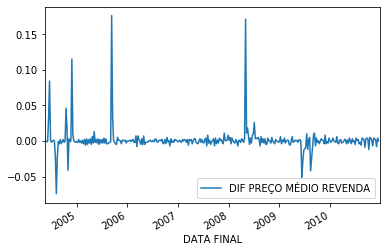

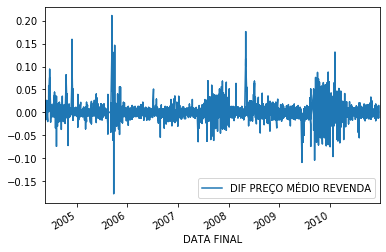

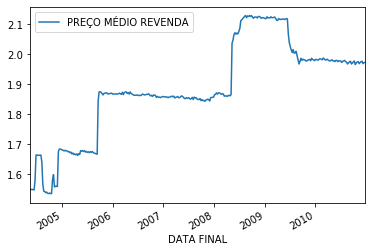

In [19]:
def target_diff(x):
    return x.diff().shift(-1)
diesel_treino["DIF PREÇO MÉDIO REVENDA"] = diesel_treino.groupby(["ESTADO"])["PREÇO MÉDIO REVENDA"].apply(target_diff)
diesel_treino[diesel_treino["ESTADO"]=="CEARA"].plot(x="DATA FINAL", y="DIF PREÇO MÉDIO REVENDA")
diesel_treino.plot(x="DATA FINAL", y="DIF PREÇO MÉDIO REVENDA")
diesel_treino[diesel_treino["ESTADO"]=="CEARA"].plot(x="DATA FINAL", y="PREÇO MÉDIO REVENDA")

In [20]:
df_X_treino["DEF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA"] = diesel_treino.groupby(["ESTADO"])["PREÇO MÉDIO REVENDA"].apply(target_diff)
df_X_valid["DEF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA"] = diesel_valid.groupby(["ESTADO"])["PREÇO MÉDIO REVENDA"].apply(target_diff)

In [21]:
df_X_treino.head()

,DEF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA
43547,0.013
43548,0.001
43549,-0.003
43550,-0.002
43551,-0.003


Sazonal

In [22]:
df_X_treino["MES"] = diesel_treino["DATA FINAL"].dt.month
df_X_treino["DIA"] = diesel_treino["DATA FINAL"].dt.day
df_X_treino["DIA DA SEMANA"] = diesel_treino["DATA FINAL"].dt.weekday
df_X_treino["DIAS DO ANO"] = diesel_treino["DATA FINAL"].dt.dayofyear

df_X_valid["MES"] = diesel_valid["DATA FINAL"].dt.month
df_X_valid["DIA"] = diesel_valid["DATA FINAL"].dt.day
df_X_valid["DIA DA SEMANA"] = diesel_valid["DATA FINAL"].dt.weekday
df_X_valid["DIAS DO ANO"] = diesel_valid["DATA FINAL"].dt.dayofyear

LAG

In [23]:
df_X_treino["PREÇO MÉDIO REVENDA ATUAL"] = diesel_treino["PREÇO MÉDIO REVENDA"]
df_X_valid["PREÇO MÉDIO REVENDA ATUAL"] = diesel_valid["PREÇO MÉDIO REVENDA"]

DIF LAG

In [24]:
df_X_treino["DIF PREÇO MÉDIO REVENDA ATUAL"] = diesel_treino.groupby(["ESTADO"])["PREÇO MÉDIO REVENDA"].diff()
df_X_valid["DIF PREÇO MÉDIO REVENDA ATUAL"] = diesel_valid.groupby(["ESTADO"])["PREÇO MÉDIO REVENDA"].diff()

Média Móvel

In [25]:
media = diesel_treino.groupby(["ESTADO"])["PREÇO MÉDIO REVENDA"].rolling(4).mean()
media.head()

ESTADO       
ACRE    43560       NaN
        43587       NaN
        43614       NaN
        43641    1.7165
        43668    1.7140
Name: PREÇO MÉDIO REVENDA, dtype: float64

In [26]:
media.reset_index(level=0, drop=True).head()

43560       NaN
43587       NaN
43614       NaN
43641    1.7165
43668    1.7140
Name: PREÇO MÉDIO REVENDA, dtype: float64

In [31]:
df_X_treino["Media 4 semanas"] = diesel_treino.groupby(["ESTADO"])["PREÇO MÉDIO REVENDA"].rolling(4).mean().reset_index(level=0, drop=True)
df_X_valid["Media 4 semanas"] = diesel_valid.groupby(["ESTADO"])["PREÇO MÉDIO REVENDA"].rolling(4).mean().reset_index(level=0, drop=True)

Randon Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
df_X_treino

,DEF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA,MES,DIA,DIA DA SEMANA,DIAS DO ANO,PREÇO MÉDIO REVENDA ATUAL,DIF PREÇO MÉDIO REVENDA ATUAL,Media 4 semanas
43628,-0.020,6,5,5,157,1.460,0.016,1.45275
43629,-0.002,6,5,5,157,1.437,0.002,1.43675
43630,0.004,6,5,5,157,1.612,-0.006,1.60675
43631,-0.001,6,5,5,157,1.523,0.000,1.52400
43632,0.000,6,5,5,157,1.358,0.001,1.35900
...,...,...,...,...,...,...,...,...
52748,-0.004,12,18,5,352,1.986,0.010,1.98150
52749,-0.007,12,18,5,352,1.970,0.006,1.96625
52750,0.011,12,18,5,352,1.942,-0.001,1.94600
52751,0.000,12,18,5,352,2.051,0.000,2.05150


In [34]:
df_X_treino = df_X_treino.dropna()
df_X_valid = df_X_valid.dropna()